In [1]:
%load_ext autoreload
%autoreload 2
import os
if 'Notebooks' in os.getcwd():
    project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
    os.chdir(project_root)
from Modules.ModelModule import Model, DataPreparation
from Modules.GradCam import GradCam
from PIL import Image
import numpy as np
import tensorflow as tf
import shap
from Modules.DataLoaderModule import DataLoader
import pickle
from Modules.InterpretationModule import Interpretation
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

e:\OneDrive\Pulpit\BSc-thesis\.venv\Lib\site-packages\fpdf\__init__.py:39: UserWarning: You have both PyFPDF & fpdf2 installed. Both packages cannot be installed at the same time as they share the same module namespace. To only keep fpdf2, run: pip uninstall --yes pypdf && pip install --upgrade fpdf2
  warnings.warn(
e:\OneDrive\Pulpit\BSc-thesis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Model.example_model()
model.load_weights('model.h5')

e:\OneDrive\Pulpit\BSc-thesis\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 10%|█         | 10/100 [00:00<00:02, 39.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


 20%|██        | 20/100 [00:00<00:01, 52.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 30%|███       | 30/100 [00:00<00:01, 58.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 40%|████      | 40/100 [00:00<00:01, 59.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 50%|█████     | 50/100 [00:00<00:00, 61.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 60%|██████    | 60/100 [00:01<00:00, 61.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 70%|███████   | 70/100 [00:01<00:00, 62.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 80%|████████  | 80/100 [00:01<00:00, 64.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 90%|█████████ | 90/100 [00:01<00:00, 65.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


100%|██████████| 100/100 [00:01<00:00, 61.86it/s]


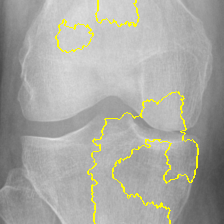

In [3]:
photo = DataPreparation.single_photo_preparation(r'data\train\train\Normal\9099440R.png')
Model.predict(model,photo)
Interpretation.show_lime_interpretation(model, photo, 1)

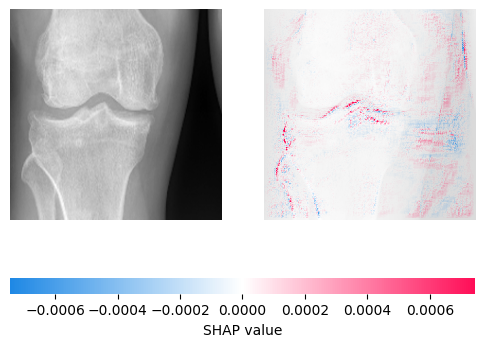

<Figure size 640x480 with 0 Axes>

In [9]:
Interpretation.show_shap(model,np.array([photo[0]]))

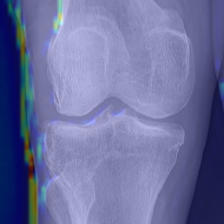

In [91]:
image = Image.open(r"C:\Users\sebas\Documents\GitHub\BSc-thesis\data\train\train\Osteoarthritis\MildG2 (200).png")
image_2 = Image.open(r"C:\Users\sebas\Documents\GitHub\BSc-thesis\data\train\train\Osteoarthritis\MildG2 (1).png")
processed_image = DataPreparation.single_photo_preparation(image=image)
processed_image_2 = DataPreparation.single_photo_preparation(image=image_2)
GradCam.create_and_overlap_gradcam(np.array([processed_image[0]]), processed_image[0],model)
GradCam.create_and_overlap_gradcam(np.array([processed_image[1]]), processed_image[1],model)
GradCam.create_and_overlap_gradcam(processed_image_2, processed_image_2[0],model)




In [7]:
data, _, _,_,_,_ = DataPreparation.training_data_preparation(False)

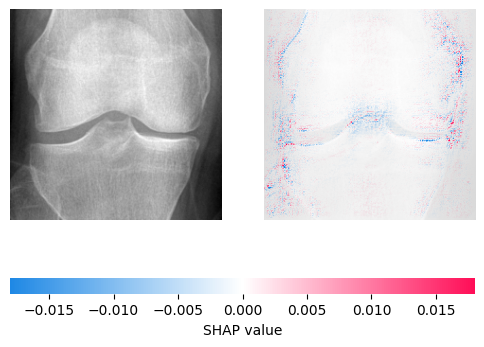

In [39]:
background = data[np.random.choice(data.shape[0], 100, replace=False)]
e = shap.DeepExplainer(model, background)
ind=[200]
shap_values = e.shap_values( data[ind])
shap.image_plot(shap_values,data[ind])

In [23]:
model.predict(data[[200]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.3687659]], dtype=float32)

In [127]:
test_photo = data[[200]]

e:\OneDrive\Pulpit\BSc-thesis\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer']. Received: the structure of inputs=*
  warnings.warn(


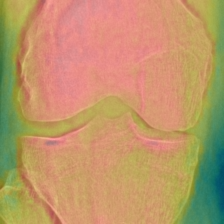

In [4]:
GradCam.create_and_overlap_gradcam(photo, photo[0],model)

In [42]:
to_save = data[np.random.choice(data.shape[0], 100, replace=False)]


In [45]:
with open('background.pickle', 'wb') as handle:
    pickle.dump(to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [46]:
background = DataLoader.load_pickle_file('background.pickle')

In [143]:
img = DataPreparation.single_photo_preparation(r'data\train\train\Osteoarthritis\9000099R.png')

In [144]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.6932409]], dtype=float32)

e:\OneDrive\Pulpit\BSc-thesis\.venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
e:\OneDrive\Pulpit\BSc-thesis\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']
  warnings.warn(


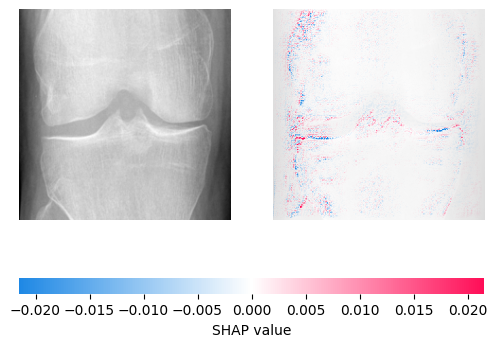

In [57]:
cos = Interpretation.show_shap(model, img)

In [2]:
img = DataPreparation.single_photo_preparation(r'data\train\train\Osteoarthritis\9497534L.png')

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 10%|█         | 10/100 [00:00<00:01, 79.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 20%|██        | 20/100 [00:00<00:01, 68.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 30%|███       | 30/100 [00:00<00:01, 65.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 40%|████      | 40/100 [00:00<00:00, 73.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 50%|█████     | 50/100 [00:00<00:00, 75.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 60%|██████    | 60/100 [00:00<00:00, 76.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 70%|███████   | 70/100 [00:00<00:00, 78.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 80%|████████  | 80/100 [00:01<00:00, 81.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 90%|█████████ | 90/100 [00:01<00:00, 79.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


100%|██████████| 100/100 [00:01<00:00, 77.14it/s]


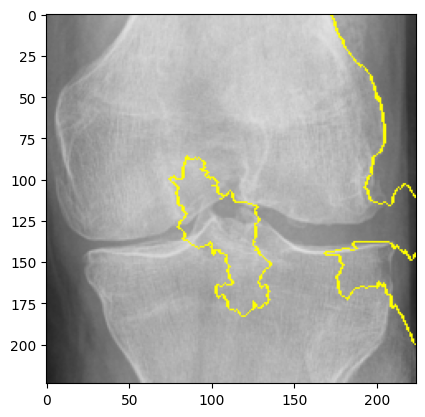

In [53]:
Interpretation.show_lime_interpretation(model, img, 1)